Files already downloaded and verified
Files already downloaded and verified


  0%|          | 1/500 [00:00<01:28,  5.65it/s]

Start of training on 15.05.2021 , 17:48:27


  0%|          | 1/500 [00:00<01:23,  6.01it/s]

epoch : 1 of 15 , learning rate: 0.01 , runtime: 89.48 seconds
training loss: 0.0158, acc 0.4268 
validation loss: 0.0120, validation acc 0.5675 


  0%|          | 1/500 [00:00<01:24,  5.87it/s]

epoch : 2 of 15 , learning rate: 0.01 , runtime: 89.29 seconds
training loss: 0.0109, acc 0.6128 
validation loss: 0.0088, validation acc 0.6877 


  0%|          | 1/500 [00:00<01:23,  5.98it/s]

epoch : 3 of 15 , learning rate: 0.01 , runtime: 89.34 seconds
training loss: 0.0086, acc 0.6990 
validation loss: 0.0074, validation acc 0.7493 


  0%|          | 1/500 [00:00<01:24,  5.93it/s]

epoch : 4 of 15 , learning rate: 0.01 , runtime: 89.19 seconds
training loss: 0.0074, acc 0.7418 
validation loss: 0.0062, validation acc 0.7883 


  0%|          | 1/500 [00:00<01:23,  5.97it/s]

epoch : 5 of 15 , learning rate: 0.01 , runtime: 89.4 seconds
training loss: 0.0066, acc 0.7712 
validation loss: 0.0059, validation acc 0.7978 


  0%|          | 1/500 [00:00<01:25,  5.87it/s]

epoch : 6 of 15 , learning rate: 0.01 , runtime: 89.12 seconds
training loss: 0.0061, acc 0.7902 
validation loss: 0.0053, validation acc 0.8168 


  0%|          | 1/500 [00:00<01:24,  5.87it/s]

epoch : 7 of 15 , learning rate: 0.01 , runtime: 89.24 seconds
training loss: 0.0055, acc 0.8099 
validation loss: 0.0053, validation acc 0.8214 


  0%|          | 1/500 [00:00<01:25,  5.87it/s]

epoch : 8 of 15 , learning rate: 0.001 , runtime: 89.26 seconds
training loss: 0.0041, acc 0.8556 
validation loss: 0.0040, validation acc 0.8629 


  0%|          | 1/500 [00:00<01:21,  6.09it/s]

epoch : 9 of 15 , learning rate: 0.001 , runtime: 89.56 seconds
training loss: 0.0037, acc 0.8689 
validation loss: 0.0039, validation acc 0.8700 


  0%|          | 1/500 [00:00<01:23,  5.95it/s]

epoch : 10 of 15 , learning rate: 0.001 , runtime: 89.57 seconds
training loss: 0.0035, acc 0.8749 
validation loss: 0.0038, validation acc 0.8719 


  0%|          | 1/500 [00:00<01:23,  5.94it/s]

epoch : 11 of 15 , learning rate: 0.001 , runtime: 89.76 seconds
training loss: 0.0034, acc 0.8836 
validation loss: 0.0038, validation acc 0.8740 


  0%|          | 1/500 [00:00<01:24,  5.87it/s]

epoch : 12 of 15 , learning rate: 0.0001 , runtime: 89.58 seconds
training loss: 0.0032, acc 0.8891 
validation loss: 0.0037, validation acc 0.8766 


  0%|          | 1/500 [00:00<01:24,  5.93it/s]

epoch : 13 of 15 , learning rate: 0.0001 , runtime: 89.58 seconds
training loss: 0.0031, acc 0.8915 
validation loss: 0.0036, validation acc 0.8776 


  0%|          | 1/500 [00:00<01:27,  5.70it/s]

epoch : 14 of 15 , learning rate: 0.0001 , runtime: 89.73 seconds
training loss: 0.0031, acc 0.8915 
validation loss: 0.0036, validation acc 0.8789 


100%|██████████| 500/500 [01:24<00:00,  5.94it/s]


epoch : 15 of 15 , learning rate: 0.0001 , runtime: 89.71 seconds
training loss: 0.0030, acc 0.8934 
validation loss: 0.0036, validation acc 0.8787 
End of training on 15.05.2021 , 18:10:49


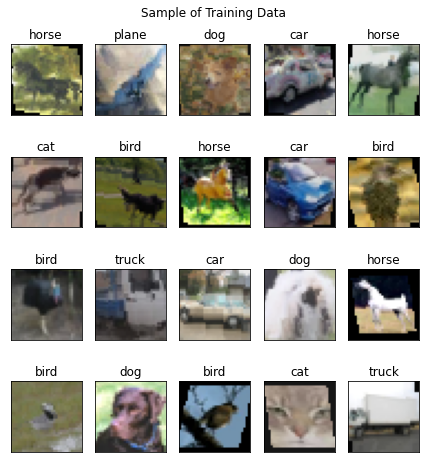

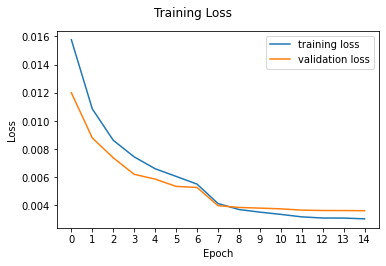

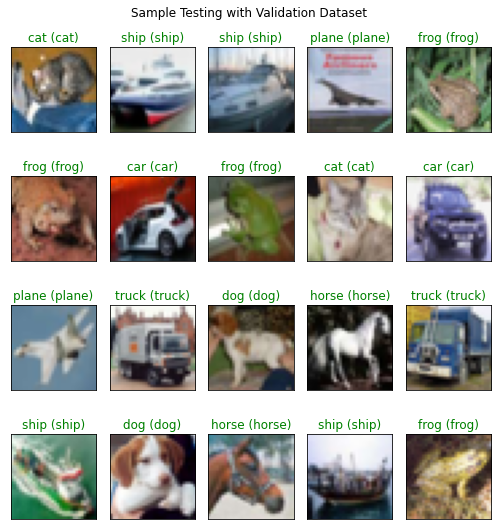

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from datetime import datetime
from datetime import date
import time

# Define Model
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, in_channels, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def ResNet34(in_channels):
    return ResNet(in_channels, BasicBlock, [3,4,6,3])

def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

def detach(tensor):
  tensor.cpu().clone().detach()

if __name__ == '__main__':
# Load CIFAR-10 Dataset
  resize=(32,32)
  transform_train = transforms.Compose([transforms.Resize((resize)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(10),
                                        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
  transform = transforms.Compose([transforms.Resize((resize)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
  training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
  validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
  validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)  

# CIFAR-10 classes
  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 # Displaying images from training data  
  dataiter = iter(training_loader)
  images, labels = dataiter.next()
  fig = plt.figure(figsize=(6,7))
  for idx in np.arange(20):
    ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])
    plt.suptitle("Sample of Training Data")
    plt.tight_layout(1.0)


# Training parameters
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = ResNet34(in_channels=3).to(device)

  print_lr = 0.01
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = print_lr,momentum=0.9, weight_decay=5e-4)

  epochs = 15
  running_loss_history = []
  running_corrects_history = []
  val_running_loss_history = []
  val_running_corrects_history = []

# Training Loop
  print("Start of training on", date.today().strftime("%d.%m.%Y"),",",datetime.now().strftime("%H:%M:%S"))
  for e in range(epochs):
    # if e>0 and (e<(epochs-1)) and (e%7==0):  
    if e in [7,11]:
      for param_group in optimizer.param_groups:
        param_group['lr'] *= 0.1
        print_lr = param_group['lr']

    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0

    epoch_start_time = time.time()
    
    for inputs, labels in tqdm(training_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      _, preds = torch.max(outputs, 1)
      running_loss += loss.item()
      running_corrects += torch.sum(preds == labels.data)

    else:
      with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
          val_inputs = val_inputs.to(device)
          val_labels = val_labels.to(device)
          val_outputs = model(val_inputs)
          val_loss = criterion(val_outputs, val_labels)
          
          _, val_preds = torch.max(val_outputs, 1)
          val_running_loss += val_loss.item()
          val_running_corrects += torch.sum(val_preds == val_labels.data)

      detach(inputs)
      detach(labels)
      detach(val_inputs)
      detach(val_labels)
      del inputs
      del labels
      del val_inputs
      del val_labels    
      torch.cuda.empty_cache()  

      epoch_run_time = round(time.time() - epoch_start_time,2)
      epoch_loss = running_loss/len(training_loader.dataset)
      epoch_acc = running_corrects.float()/ len(training_loader.dataset)
      running_loss_history.append(epoch_loss)
      running_corrects_history.append(epoch_acc)
      
      val_epoch_loss = val_running_loss/len(validation_loader.dataset)
      val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
      val_running_loss_history.append(val_epoch_loss)
      val_running_corrects_history.append(val_epoch_acc)
      print('epoch :', (e+1),"of",epochs,", learning rate:",print_lr,", runtime:",epoch_run_time,"seconds")
      print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
      print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))
  print("End of training on", date.today().strftime("%d.%m.%Y"),",",datetime.now().strftime("%H:%M:%S"))    

# Plot training loss 
  plt.figure()
  plt.plot(running_loss_history, label='training loss')
  plt.plot(val_running_loss_history, label='validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.tight_layout(3.0)
  plt.xticks(ticks=list(range(epochs))) 
  plt.legend()
  plt.suptitle("Training Loss")

# Validation: Show output of trained model
  dataiter = iter(validation_loader)
  images, labels = dataiter.next()
  images = images.to(device)
  labels = labels.to(device)
  output = model(images)
  _, preds = torch.max(output, 1)

  fig = plt.figure(figsize=(7,8))
  for idx in np.arange(20):
    ax = fig.add_subplot(4,5, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    plt.suptitle("Sample Testing with Validation Dataset")
    plt.tight_layout(1.0)
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

  model.to('cpu')
  detach(images)
  detach(labels)
  del images
  del labels 

In [7]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=